In [12]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import os

In [13]:
if os.path.exists("sales_data.db"):
    os.remove("sales_data.db")

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL,
    sale_date DATE NOT NULL
)
''')

sample_sales = [
    ('Laptop', 2, 999.99, '2024-01-15'),
    ('Mouse', 5, 25.50, '2024-01-15'),
    ('Laptop', 1, 999.99, '2024-01-16'),
    ('Keyboard', 3, 75.00, '2024-01-16'),
    ('Monitor', 1, 299.99, '2024-01-17'),
    ('Mouse', 2, 25.50, '2024-01-17'),
    ('Keyboard', 1, 75.00, '2024-01-18'),
    ('Monitor', 2, 299.99, '2024-01-18'),
    ('Laptop', 1, 999.99, '2024-01-19'),
    ('Headphones', 4, 149.99, '2024-01-20')
]

cursor.executemany('''
INSERT INTO sales (product, quantity, price, sale_date)
VALUES (?, ?, ?, ?)
''', sample_sales)

conn.commit()
conn.close()

print(" Database 'sales_data.db' created successfully!")
print(" Sample data inserted into 'sales' table!")

 Database 'sales_data.db' created successfully!
 Sample data inserted into 'sales' table!


In [5]:
conn = sqlite3.connect("sales_data.db")

cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()
print("Tables in database:", tables)

df_sample = pd.read_sql_query("SELECT * FROM sales LIMIT 5", conn)
print("\n Sample data from sales table:")
print(df_sample)

conn.close()

Tables in database: [('sales',), ('sqlite_sequence',)]

 Sample data from sales table:
   id   product  quantity   price   sale_date
0   1    Laptop         2  999.99  2024-01-15
1   2     Mouse         5   25.50  2024-01-15
2   3    Laptop         1  999.99  2024-01-16
3   4  Keyboard         3   75.00  2024-01-16
4   5   Monitor         1  299.99  2024-01-17


In [14]:
conn = sqlite3.connect("sales_data.db")

query = """
SELECT 
    product, 
    SUM(quantity) AS total_quantity, 
    SUM(quantity * price) AS total_revenue,
    ROUND(AVG(price), 2) AS average_price
FROM sales 
GROUP BY product
ORDER BY total_revenue DESC
"""

df_sales = pd.read_sql_query(query, conn)

print("SALES SUMMARY BY PRODUCT")
print("=" * 50)
print(df_sales)

conn.close()

SALES SUMMARY BY PRODUCT
      product  total_quantity  total_revenue  average_price
0      Laptop               4        3999.96         999.99
1     Monitor               3         899.97         299.99
2  Headphones               4         599.96         149.99
3    Keyboard               4         300.00          75.00
4       Mouse               7         178.50          25.50


In [7]:
print("BUSINESS INTELLIGENCE REPORT")
print("=" * 55)

print("\n PRODUCT PERFORMANCE:")
print("-" * 40)
for index, row in df_sales.iterrows():
    print(f" {row['product']:12} | "
          f"Qty: {row['total_quantity']:2} | "
          f"Revenue: ${row['total_revenue']:8.2f} | "
          f"Avg Price: ${row['average_price']:6.2f}")

total_revenue = df_sales['total_revenue'].sum()
total_quantity = df_sales['total_quantity'].sum()

print("\n OVERALL SUMMARY:")
print("-" * 25)
print(f"Total Products:    {len(df_sales)}")
print(f"Total Quantity:    {total_quantity} units")
print(f"Total Revenue:     ${total_revenue:,.2f}")
print(f"Average per Product: ${(total_revenue/len(df_sales)):,.2f}")

BUSINESS INTELLIGENCE REPORT

 PRODUCT PERFORMANCE:
----------------------------------------
 Laptop       | Qty:  4 | Revenue: $ 3999.96 | Avg Price: $999.99
 Monitor      | Qty:  3 | Revenue: $  899.97 | Avg Price: $299.99
 Headphones   | Qty:  4 | Revenue: $  599.96 | Avg Price: $149.99
 Keyboard     | Qty:  4 | Revenue: $  300.00 | Avg Price: $ 75.00
 Mouse        | Qty:  7 | Revenue: $  178.50 | Avg Price: $ 25.50

 OVERALL SUMMARY:
-------------------------
Total Products:    5
Total Quantity:    22 units
Total Revenue:     $5,978.39
Average per Product: $1,195.68


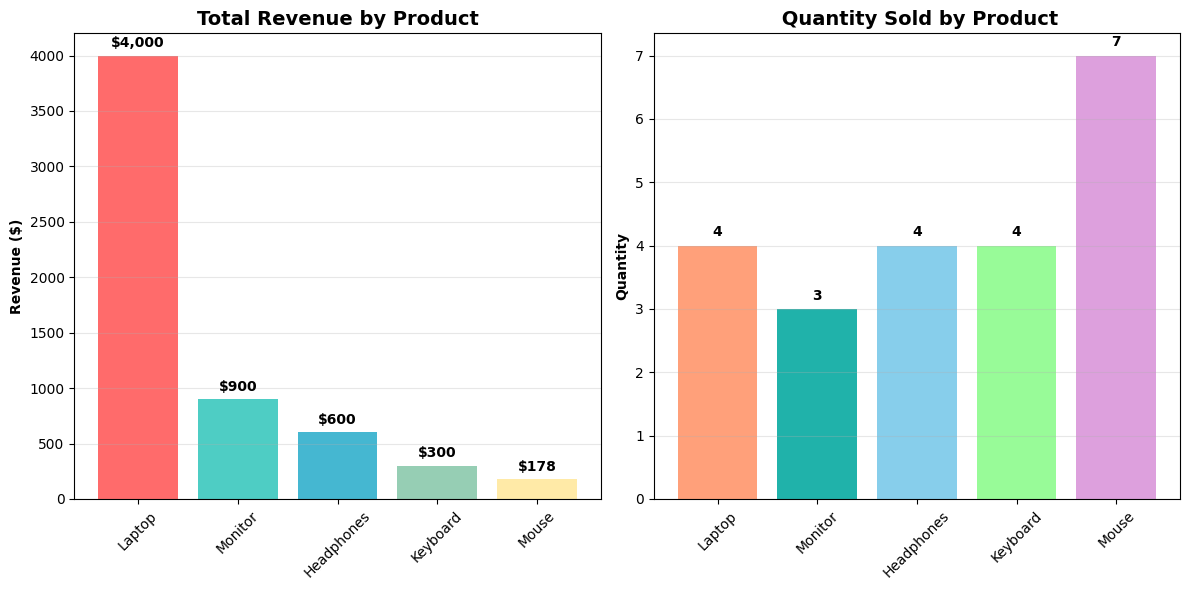

Bar charts created successfully!


In [8]:
plt.figure(figsize=(12, 6))

# Revenue chart
plt.subplot(1, 2, 1)
bars = plt.bar(df_sales['product'], df_sales['total_revenue'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7'])
plt.title('Total Revenue by Product', fontsize=14, fontweight='bold')
plt.ylabel('Revenue ($)', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'${height:,.0f}',
             ha='center', va='bottom', fontweight='bold')

# Quantity chart
plt.subplot(1, 2, 2)
bars2 = plt.bar(df_sales['product'], df_sales['total_quantity'],
                color=['#FFA07A', '#20B2AA', '#87CEEB', '#98FB98', '#DDA0DD'])
plt.title(' Quantity Sold by Product', fontsize=14, fontweight='bold')
plt.ylabel('Quantity', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.0f}',
             ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("Bar charts created successfully!")

DAILY SALES TREND
    sale_date  daily_quantity  daily_revenue
0  2024-01-15               7        2127.48
1  2024-01-16               4        1224.99
2  2024-01-17               3         350.99
3  2024-01-18               3         674.98
4  2024-01-19               1         999.99
5  2024-01-20               4         599.96


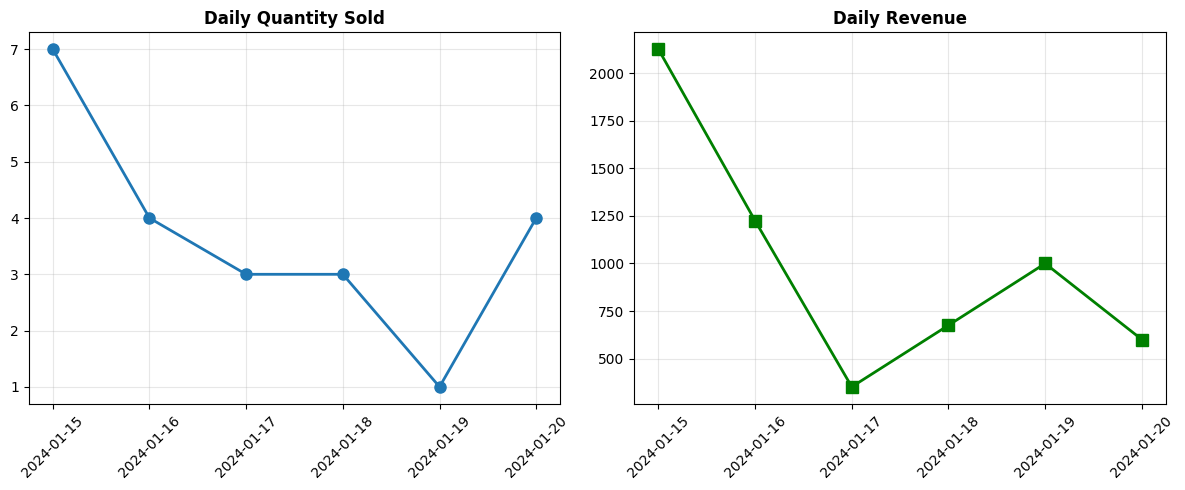

In [9]:
conn = sqlite3.connect("sales_data.db")

daily_query = """
SELECT 
    sale_date,
    SUM(quantity) as daily_quantity,
    SUM(quantity * price) as daily_revenue
FROM sales
GROUP BY sale_date
ORDER BY sale_date
"""

df_daily = pd.read_sql_query(daily_query, conn)
conn.close()

print("DAILY SALES TREND")
print("=" * 40)
print(df_daily)

# Plot daily trend
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(df_daily['sale_date'], df_daily['daily_quantity'], marker='o', linewidth=2, markersize=8)
plt.title('Daily Quantity Sold', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(df_daily['sale_date'], df_daily['daily_revenue'], marker='s', color='green', linewidth=2, markersize=8)
plt.title('Daily Revenue', fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

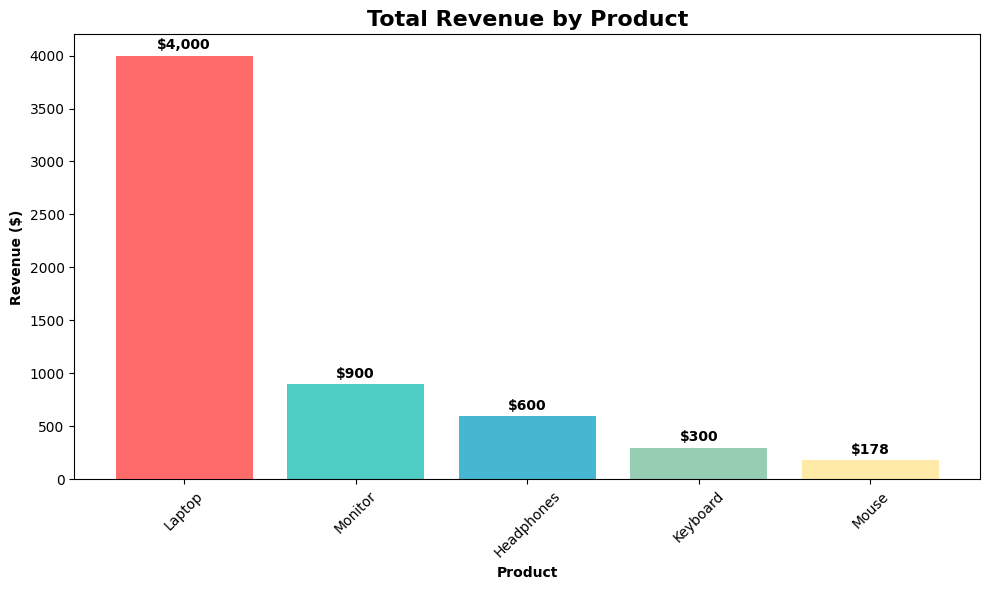

 Chart saved as 'sales_revenue_chart.png'
 Data exported as 'sales_summary.csv'

 ANALYSIS COMPLETE!
